In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from env import host, username, password
import prepare
import wrangle
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
import explore
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
df = pd.read_csv('zillow_data.csv')

In [2]:
prep_df = wrangle.prep_zillow(df)

In [3]:
train, validate, test = wrangle.split_data(prep_df)

In [4]:
scaled_train = wrangle.min_max_scaler(train)

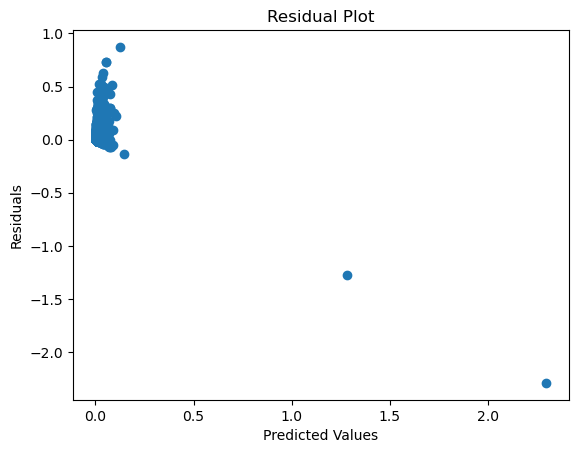

In [5]:
# Fit a linear regression model (ordinary least squares) and compute that,
# predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

X = scaled_train['calculatedfinishedsquarefeet'].values.reshape(-1, 1)
y = scaled_train['taxvaluedollarcnt'].values.reshape(-1, 1)

model = LinearRegression().fit(X, y)
predictions = model.predict(X)

residuals = y - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [6]:
# Calculate the sum of squared errors,
# explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

SSE = np.sum((y - predictions)**2)
ESS = np.sum((predictions - np.mean(y))**2)
TSS = SSE + ESS
MSE = SSE / len(predictions)
RMSE = np.sqrt(MSE)
# print
print("SSE:", SSE)
print("ESS:", ESS)
print("TSS:", TSS)
print("MSE:", MSE)
print("RMSE:", RMSE)

SSE: 60.13552571331696
ESS: 13.963024073141998
TSS: 74.09854978645896
MSE: 4.68293791050336e-05
RMSE: 0.006843199478682001


In [7]:
# Calculate the sum of squared errors, mean squared error, and root mean squared error
# for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

# assuming zillow_data and y are already defined
baseline_predictions = np.full_like(y, np.mean(y))
baseline_SSE = np.sum((y - baseline_predictions)**2)
baseline_MSE = baseline_SSE / len(y)
baseline_RMSE = np.sqrt(baseline_MSE)

print("Baseline SSE:", baseline_SSE)
print("Baseline MSE:", baseline_MSE)
print("Baseline RMSE:", baseline_RMSE)

Baseline SSE: 74.09854978645886
Baseline MSE: 5.770281440002216e-05
Baseline RMSE: 0.0075962368578146745


In [8]:
# Write python code that compares the sum of squared errors for your model against the sum of
# squared errors for the baseline model and outputs whether or not your model performs better
# than the baseline model.


model_SSE = np.sum((y - model.predict(X))**2)

if model_SSE < baseline_SSE:
    print("The linear regression model performs better than the baseline model.")
else:
    print("The baseline model performs better than the linear regression model.")



The linear regression model performs better than the baseline model.


In [9]:
# What is the amount of variance explained in your model?

model.fit(X, y)  # fit the model
r_squared = model.score(X, y)

print("R-squared:", r_squared)

R-squared: 0.18843856071922171


In [10]:
# Is your model better than the baseline model?
# yes, the SSE for the model is lower than the SSE for the baseline, 
# it indicates that the model performs better than the baseline.